## Cài đặt thư viện 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import os.path
from os import path
from pylab import rcParams
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import pickle
import os
import joblib

## Xử lý + Khảo sát bộ dữ liệu 

In [2]:
# Đọc dữ liệu từ folder 
df = pd.read_csv("D:/Github/Electric-Power-Consumption/dataset/powerconsumption.csv", sep=",")

df.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
# chuyển cột Datetime thành Index 
df.set_index("Datetime", inplace = True) 

df.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52416 entries, 1/1/2017 0:00 to 12/30/2017 23:50
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6+ MB


In [5]:
len(df)

52416

In [34]:
scaler_Temperature = MinMaxScaler(feature_range=(0,1))
scaler_Humidity = MinMaxScaler(feature_range=(0,1))
scaler_WindSpeed = MinMaxScaler(feature_range=(0,1))
scaler_GeneralDiffuseFlows = MinMaxScaler(feature_range=(0,1))
scaler_DiffuseFlows = MinMaxScaler(feature_range=(0,1))
scaler_PowerConsumption_Zone1 = MinMaxScaler(feature_range=(0,1))
scaler_PowerConsumption_Zone2 = MinMaxScaler(feature_range=(0,1))
scaler_PowerConsumption_Zone3 = MinMaxScaler(feature_range=(0,1))




df_Temperature = scaler_Temperature.fit_transform(np.array(df['Temperature']).reshape(-1,1))
df_Humidity = scaler_Humidity.fit_transform(np.array(df['Humidity']).reshape(-1,1))
df_WindSpeed = scaler_WindSpeed.fit_transform(np.array(df['WindSpeed']).reshape(-1,1))
df_GeneralDiffuseFlows = scaler_GeneralDiffuseFlows.fit_transform(np.array(df['GeneralDiffuseFlows']).reshape(-1,1))
df_DiffuseFlows = scaler_DiffuseFlows.fit_transform(np.array(df['DiffuseFlows']).reshape(-1,1))
df_PowerConsumption_Zone1 = scaler_PowerConsumption_Zone1.fit_transform(np.array(df['PowerConsumption_Zone1']).reshape(-1,1))
df_PowerConsumption_Zone2 = scaler_PowerConsumption_Zone2.fit_transform(np.array(df['PowerConsumption_Zone2']).reshape(-1,1))
df_PowerConsumption_Zone3 = scaler_PowerConsumption_Zone3.fit_transform(np.array(df['PowerConsumption_Zone3']).reshape(-1,1))

<Figure size 1000x800 with 0 Axes>

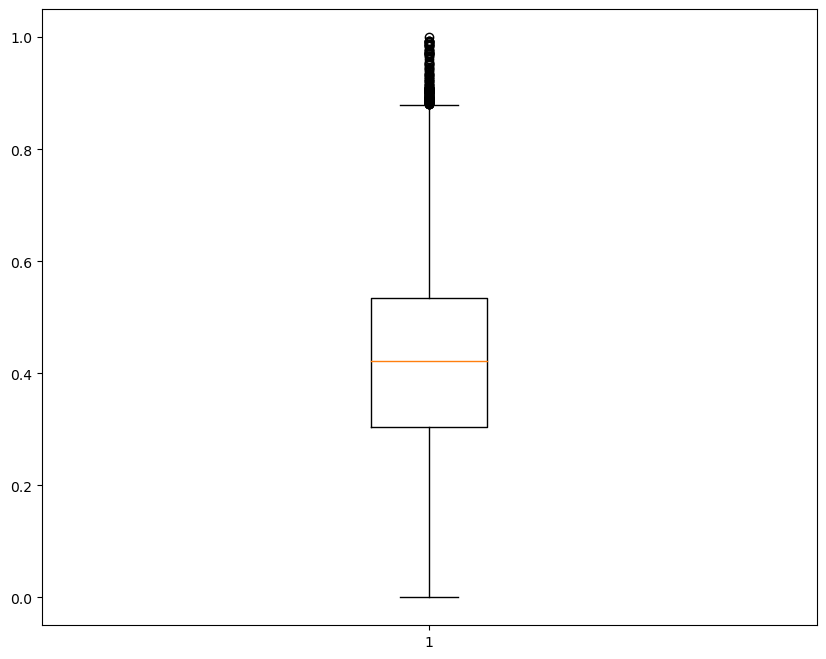

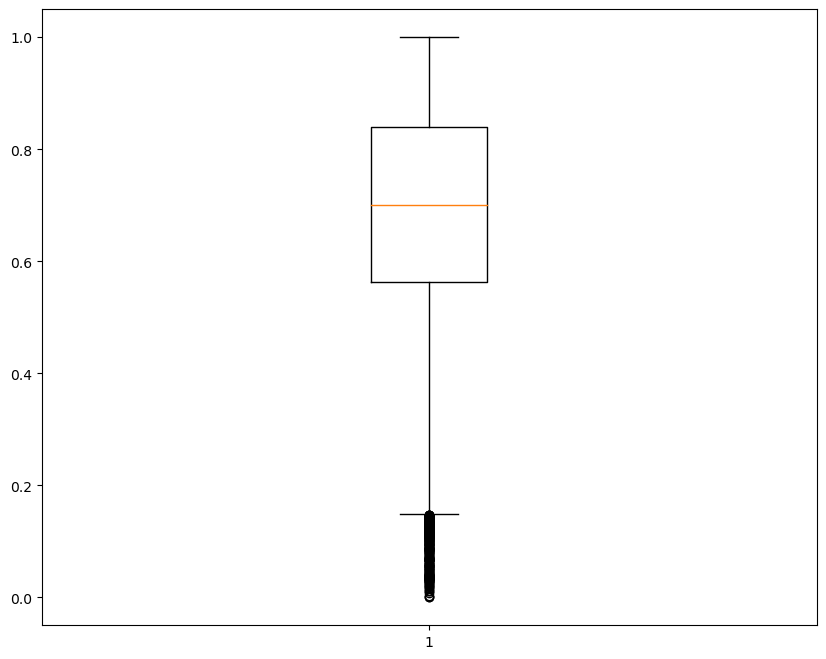

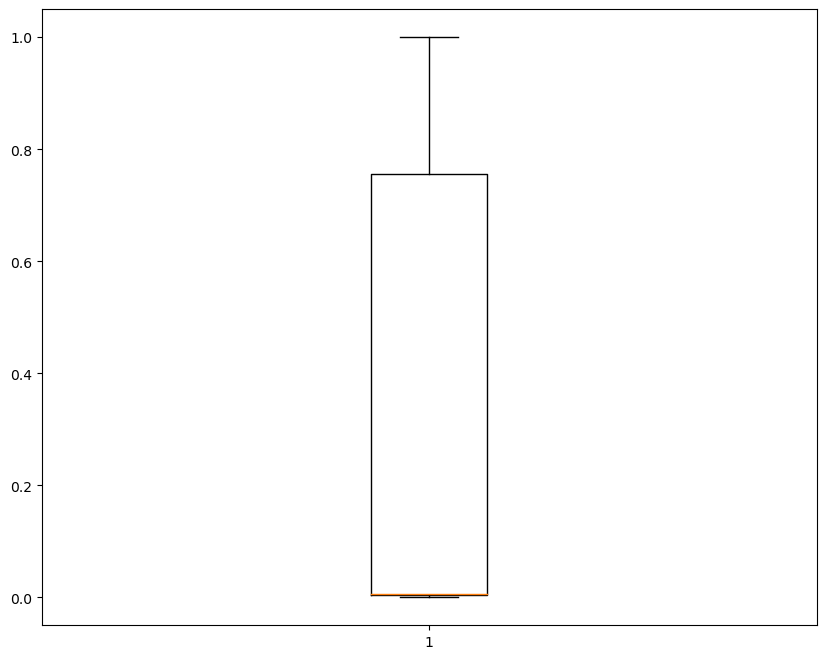

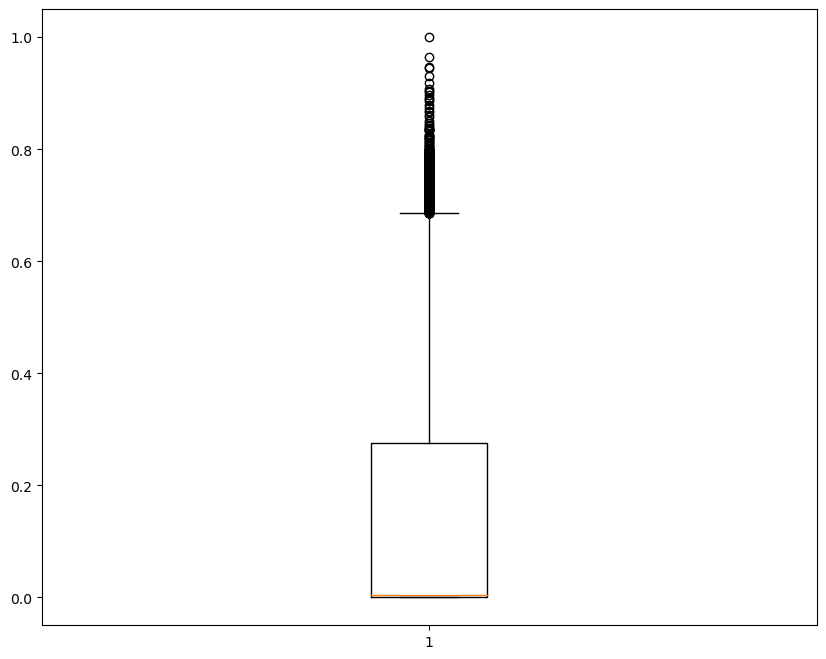

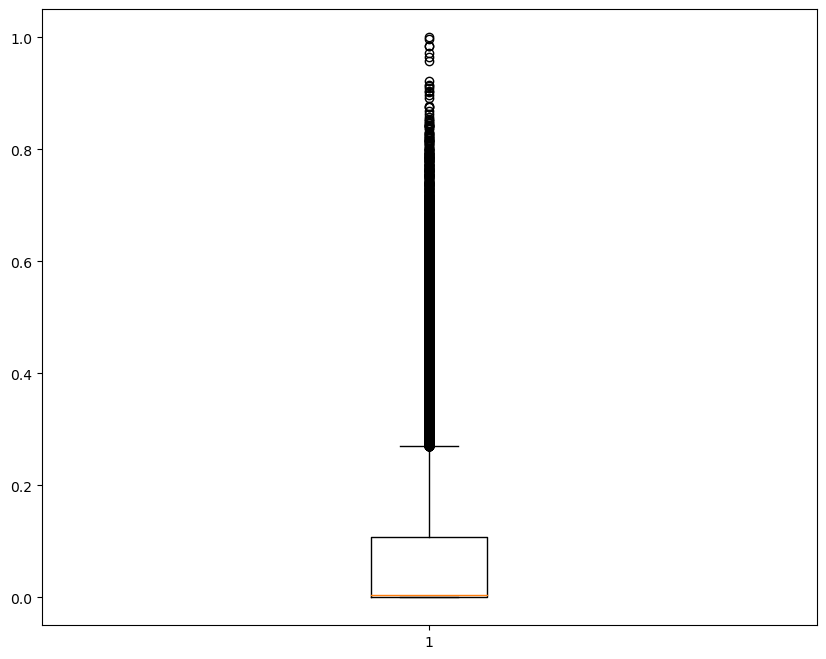

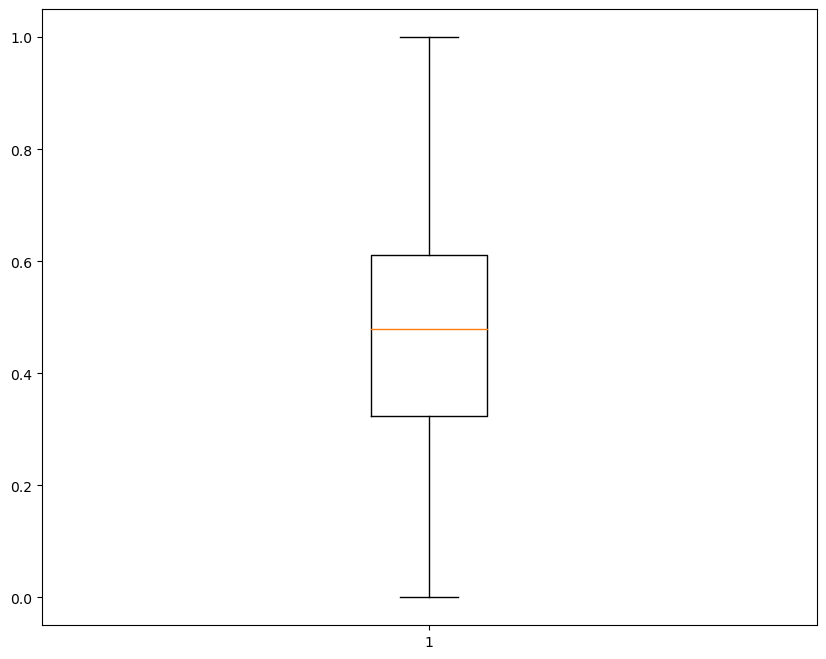

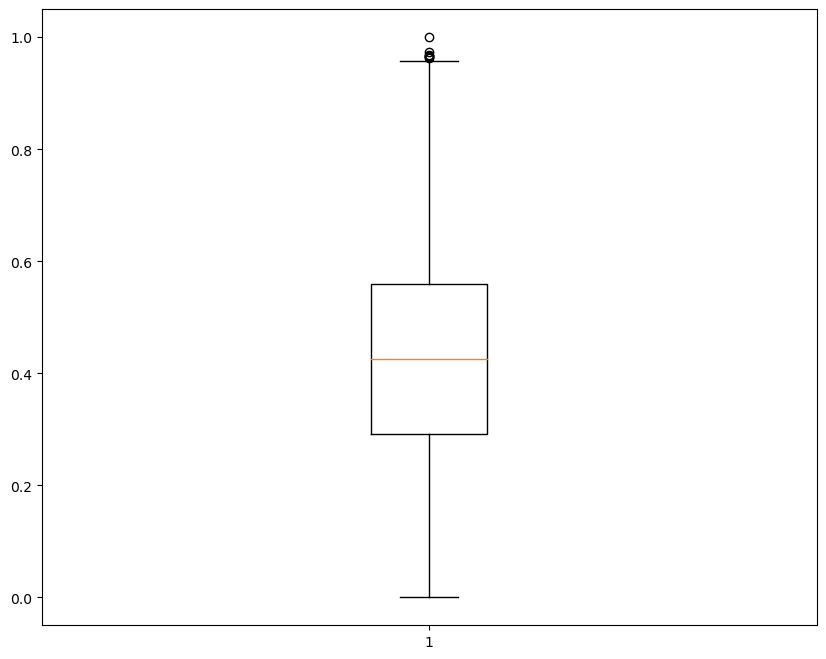

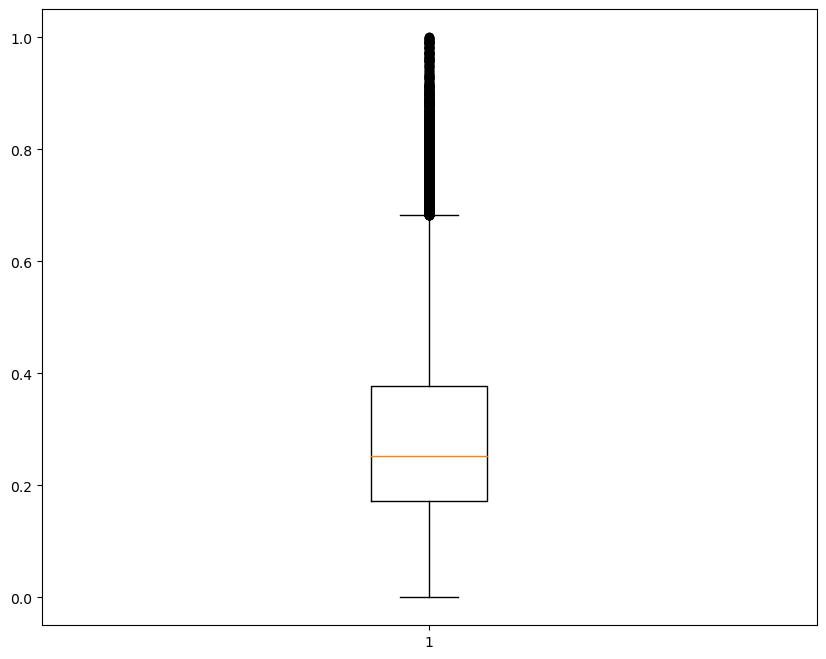

In [91]:
plt.figure(figsize=(10, 8))

data = [df_Temperature, df_Humidity, df_WindSpeed, df_GeneralDiffuseFlows, df_DiffuseFlows, df_PowerConsumption_Zone1, df_PowerConsumption_Zone2, df_PowerConsumption_Zone3]
for i in range(len(data)):
    plt.figure(figsize=(10, 8))
    plt.boxplot(data[i])
# show plot
    plt.show()